In [1]:
import numpy as np

from wishart_clustering import wishart_clustering


class Lorentz:
    def __init__(self, s = 10, r = 28, b = 8/3):
        self.s = s
        self.r = r
        self.b = b

    # Differential equations of a Lorenz System
    def X(self, x, y, s):
        return s * (y - x)

    def Y(self, x, y, z, r):
        return (-x) * z + r * x - y

    def Z(self, x, y, z, b):
        return x * y - b * z

    # RK4 for the differential equations
    def RK4(self, x, y, z, s, r, b, dt):
        k_1 = self.X(x, y, s)
        l_1 = self.Y(x, y, z, r)
        m_1 = self.Z(x, y, z, b)

        k_2 = self.X((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), s)
        l_2 = self.Y((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), r)
        m_2 = self.Z((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), b)

        k_3 = self.X((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), s)
        l_3 = self.Y((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), r)
        m_3 = self.Z((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), b)

        k_4 = self.X((x + k_3 * dt), (y + l_3 * dt), s)
        l_4 = self.Y((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), r)
        m_4 = self.Z((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), b)

        x += (k_1 + 2 * k_2 + 2 * k_3 + k_4) * dt * (1/6)
        y += (l_1 + 2 * l_2 + 2 * l_3 + l_4) * dt * (1/6)
        z += (m_1 + 2 * m_2 + 2 * m_3 + m_4) * dt * (1/6)

        return (x, y, z)

    def generate(self, dt, steps):
        # Initial values and Parameters
        x_0, y_0, z_0 = 1, 1, 1

        # RK4 iteration
        x_list = [x_0]
        y_list = [y_0]
        z_list = [z_0]

        i = 0

        while i < steps:
            x = x_list[i]
            y = y_list[i]
            z = z_list[i]

            position = self.RK4(x, y, z, self.s, self.r, self.b, dt)
            x_list.append(position[0])
            y_list.append(position[1])
            z_list.append(position[2])

            i += 1

        x_array = np.array(x_list)
        y_array = np.array(y_list)
        z_array = np.array(z_list)

        return x_array, y_array, z_array
def normalize(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

def denormalize(arr, min, max):
    return arr * (max - min) + min

N = 10000
x, _, _ = Lorentz().generate(0.1, N - 1)

x_max = x.max()
x_min = x.min()
x = normalize(x)
print(x)
print(len(x))



[0.52356996 0.55805846 0.67809835 ... 0.51981119 0.55134232 0.63545381]
10000


In [2]:
from itertools import product

Kmax = 15
L = 4

patterns = list(product(range(1, Kmax + 1), repeat=L-1))

In [3]:
import random

#SAMPLE_NUM = 10
#patterns = random.sample(patterns, SAMPLE_NUM)

In [4]:
#patterns_clustering: list[list[np.array]] = []

#total_size = 0
#for pattern in patterns:
#    pref = np.cumsum([0] + list(pattern))
#    T = len(x) // 2
#    seqs = [tuple([i + e for e in pref]) for i in range(T - sum(pattern))]
#    samples = np.array([[x[i] for i in e] for e in seqs])
#    patterns_clustering.append(wishart_clustering(samples, L))
#    total_size += sum([e.size for e in patterns_clustering[-1]])


#print(total_size)

In [5]:
T = N - 1000
samples = []
for pattern in patterns:
    pref = np.cumsum([0] + list(pattern))
    seqs = [tuple([i + e for e in pref]) for i in range(T - sum(pattern))]
    samples.append(np.array([[x[i] for i in e] for e in seqs]))
samples

[array([[0.52356996, 0.55805846, 0.67809835, 0.96076323],
        [0.55805846, 0.67809835, 0.96076323, 0.85044576],
        [0.67809835, 0.96076323, 0.85044576, 0.52222428],
        ...,
        [0.74299449, 0.51865715, 0.44036851, 0.38542888],
        [0.51865715, 0.44036851, 0.38542888, 0.29372256],
        [0.44036851, 0.38542888, 0.29372256, 0.15981902]], shape=(8997, 4)),
 array([[0.52356996, 0.55805846, 0.67809835, 0.85044576],
        [0.55805846, 0.67809835, 0.96076323, 0.52222428],
        [0.67809835, 0.96076323, 0.85044576, 0.38334067],
        ...,
        [0.95992799, 0.74299449, 0.51865715, 0.38542888],
        [0.74299449, 0.51865715, 0.44036851, 0.29372256],
        [0.51865715, 0.44036851, 0.38542888, 0.15981902]], shape=(8996, 4)),
 array([[0.52356996, 0.55805846, 0.67809835, 0.52222428],
        [0.55805846, 0.67809835, 0.96076323, 0.38334067],
        [0.67809835, 0.96076323, 0.85044576, 0.32413669],
        ...,
        [0.81096377, 0.95992799, 0.74299449, 0.385428

In [6]:
from scipy.stats import mode

eps = 0.01
predicted = list(x[:T])
error = []
H = 100
algorithm = 'mean'
for h in range(H):
    S = []
    for index, pattern in enumerate(patterns):
        suf = np.cumsum(list(pattern)[::-1])
        current = np.array([predicted[T + h - e] for e in suf][::-1])
        good_indexes = np.where(np.linalg.norm(samples[index][:, :L - 1] - current[np.newaxis, :], axis=1) < eps)[0]
        #print(samples[index][good_indexes, :])
        if good_indexes.size > 0:
            S += list(samples[index][good_indexes, L - 1])

    result = 0
    S = np.array(S)
    if algorithm == 'mean':
        result = np.mean(S)
    elif algorithm == 'rsq_mean':
        result = np.sqrt(np.sum(S ** 2) / len(S))
    elif algorithm == 'mode':
        result = mode(S)[0]
    elif algorithm == 'wishart':
        S = np.array([[e] for e in S])
        clst = wishart_clustering(S, 1)
        largest_clst = np.argmax(np.array([len(e) for e in clst]))
        result = np.sum(clst[largest_clst]) / clst[largest_clst].size

    predicted.append(result)
    error.append(abs(result - x[T + h]))
    print(h + 1)
    #print(f"{h + 1}. result: {result}; correct: {x[T + h]}; error: {error[-1]}; S size: {len(S)}")

predicted = np.array(predicted)[T:]
error = np.array(error)
error = np.sqrt(np.cumsum(error ** 2) / np.array(range(1, H + 1)))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [12]:
print(samples)
print(sum([e.size for e in samples]))

[array([[0.52356996, 0.55805846, 0.67809835, 0.96076323],
       [0.55805846, 0.67809835, 0.96076323, 0.85044576],
       [0.67809835, 0.96076323, 0.85044576, 0.52222428],
       ...,
       [0.74299449, 0.51865715, 0.44036851, 0.38542888],
       [0.51865715, 0.44036851, 0.38542888, 0.29372256],
       [0.44036851, 0.38542888, 0.29372256, 0.15981902]], shape=(8997, 4)), array([[0.52356996, 0.55805846, 0.67809835, 0.85044576],
       [0.55805846, 0.67809835, 0.96076323, 0.52222428],
       [0.67809835, 0.96076323, 0.85044576, 0.38334067],
       ...,
       [0.95992799, 0.74299449, 0.51865715, 0.38542888],
       [0.74299449, 0.51865715, 0.44036851, 0.29372256],
       [0.51865715, 0.44036851, 0.38542888, 0.15981902]], shape=(8996, 4)), array([[0.52356996, 0.55805846, 0.67809835, 0.52222428],
       [0.55805846, 0.67809835, 0.96076323, 0.38334067],
       [0.67809835, 0.96076323, 0.85044576, 0.32413669],
       ...,
       [0.81096377, 0.95992799, 0.74299449, 0.38542888],
       [0.959

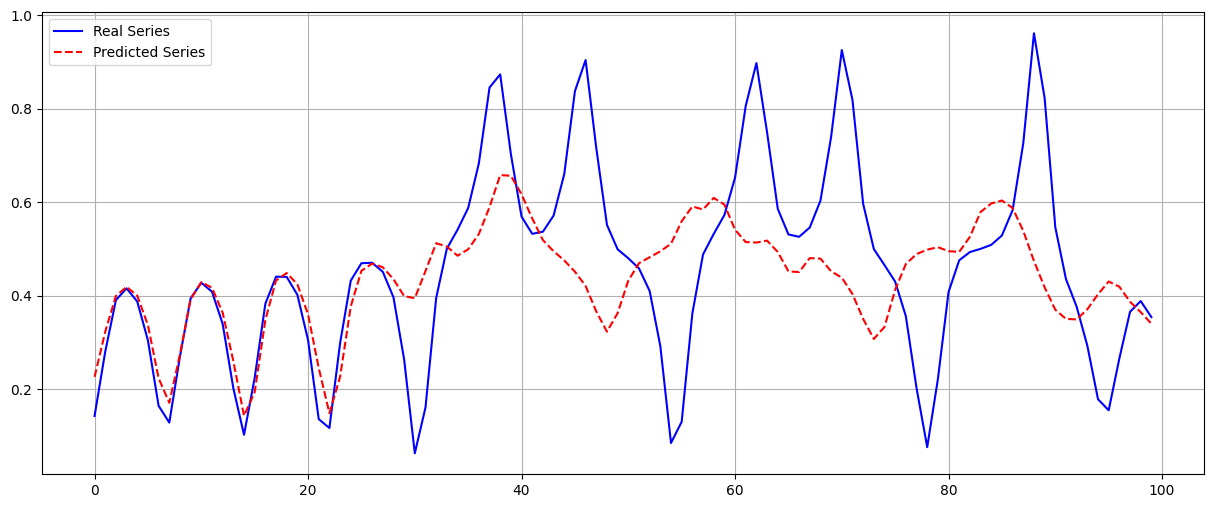

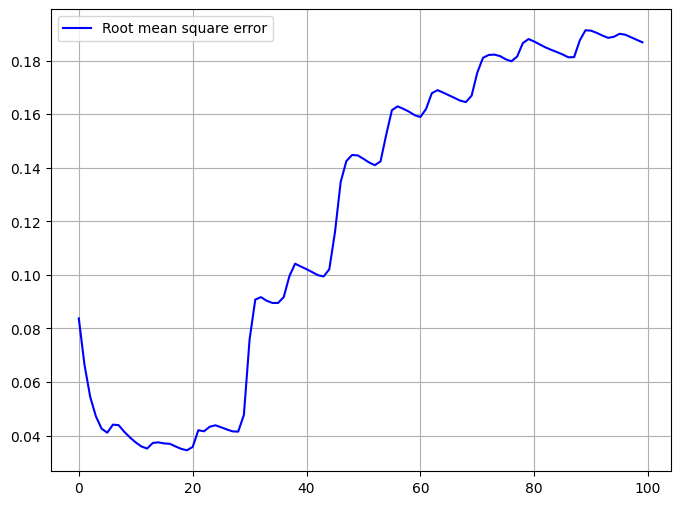

In [8]:
import matplotlib.pyplot as plt

X = np.array(range(H))
Y = x[T:T + H]

plt.figure(figsize=(15, 6))
plt.plot(X, Y, color='blue', label="Real Series")
Y = predicted
plt.plot(X, Y, color='red', label="Predicted Series", ls='--')
plt.grid()
#plt.title('dt 0.025')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(X, error, color='blue', label="Root mean square error")
plt.grid()
#plt.title('dt 0.025 RMSE')
plt.legend()
plt.show()